## Desafio

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from pingouin import ttest
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, f1_score, auc, log_loss, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import optuna

## Carregar os Dados

In [2]:
df_stars = pd.read_csv('./dataset/pulsar.csv')

In [3]:
df_stars.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


In [4]:
df_stars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Mean of the integrated profile                17898 non-null  float64
 1   Standard deviation of the integrated profile  17898 non-null  float64
 2   Excess kurtosis of the integrated profile     17898 non-null  float64
 3   Skewness of the integrated profile            17898 non-null  float64
 4   Mean of the DM-SNR curve                      17898 non-null  float64
 5   Standard deviation of the DM-SNR curve        17898 non-null  float64
 6   Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7   Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                  17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [5]:
df_stars.head(10)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
5,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0
6,119.484375,48.765059,0.031460,-0.112168,0.999164,9.279612,19.206230,479.756567,0
7,130.382812,39.844056,-0.158323,0.389540,1.220736,14.378941,13.539456,198.236457,0
8,107.250000,52.627078,0.452688,0.170347,2.331940,14.486853,9.001004,107.972506,0
9,107.257812,39.496488,0.465882,1.162877,4.079431,24.980418,7.397080,57.784738,0


In [10]:
novos_nomes = {
    'Mean of the integrated profile': 'mean_integrated_profile',
    'Standard deviation of the integrated profile': 'std_integrated_profile',
    'Excess kurtosis of the integrated profile': 'kurtosis_integrated_profile',
    'Skewness of the integrated profile': 'skewness_integrated_profile',
    'Mean of the DM-SNR curve': 'mean_dm_snr',
    'Standard deviation of the DM-SNR curve': 'std_dm_snr',
    'Excess kurtosis of the DM-SNR curve': 'kurtosis_dm_snr',
    'Skewness of the DM-SNR curve': 'skewness_dm_snr'
}

df_stars.rename(columns=novos_nomes, inplace=True)

df_stars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   mean_integrated_profile      17898 non-null  float64
 1   std_integrated_profile       17898 non-null  float64
 2   kurtosis_integrated_profile  17898 non-null  float64
 3   skewness_integrated_profile  17898 non-null  float64
 4   mean_dm_snr                  17898 non-null  float64
 5   std_dm_snr                   17898 non-null  float64
 6   kurtosis_dm_snr              17898 non-null  float64
 7   skewness_dm_snr              17898 non-null  float64
 8   target_class                 17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [11]:
contagem_target = df_stars.value_counts('target_class')
px.bar(contagem_target/len(df_stars) * 100, color=contagem_target.index)

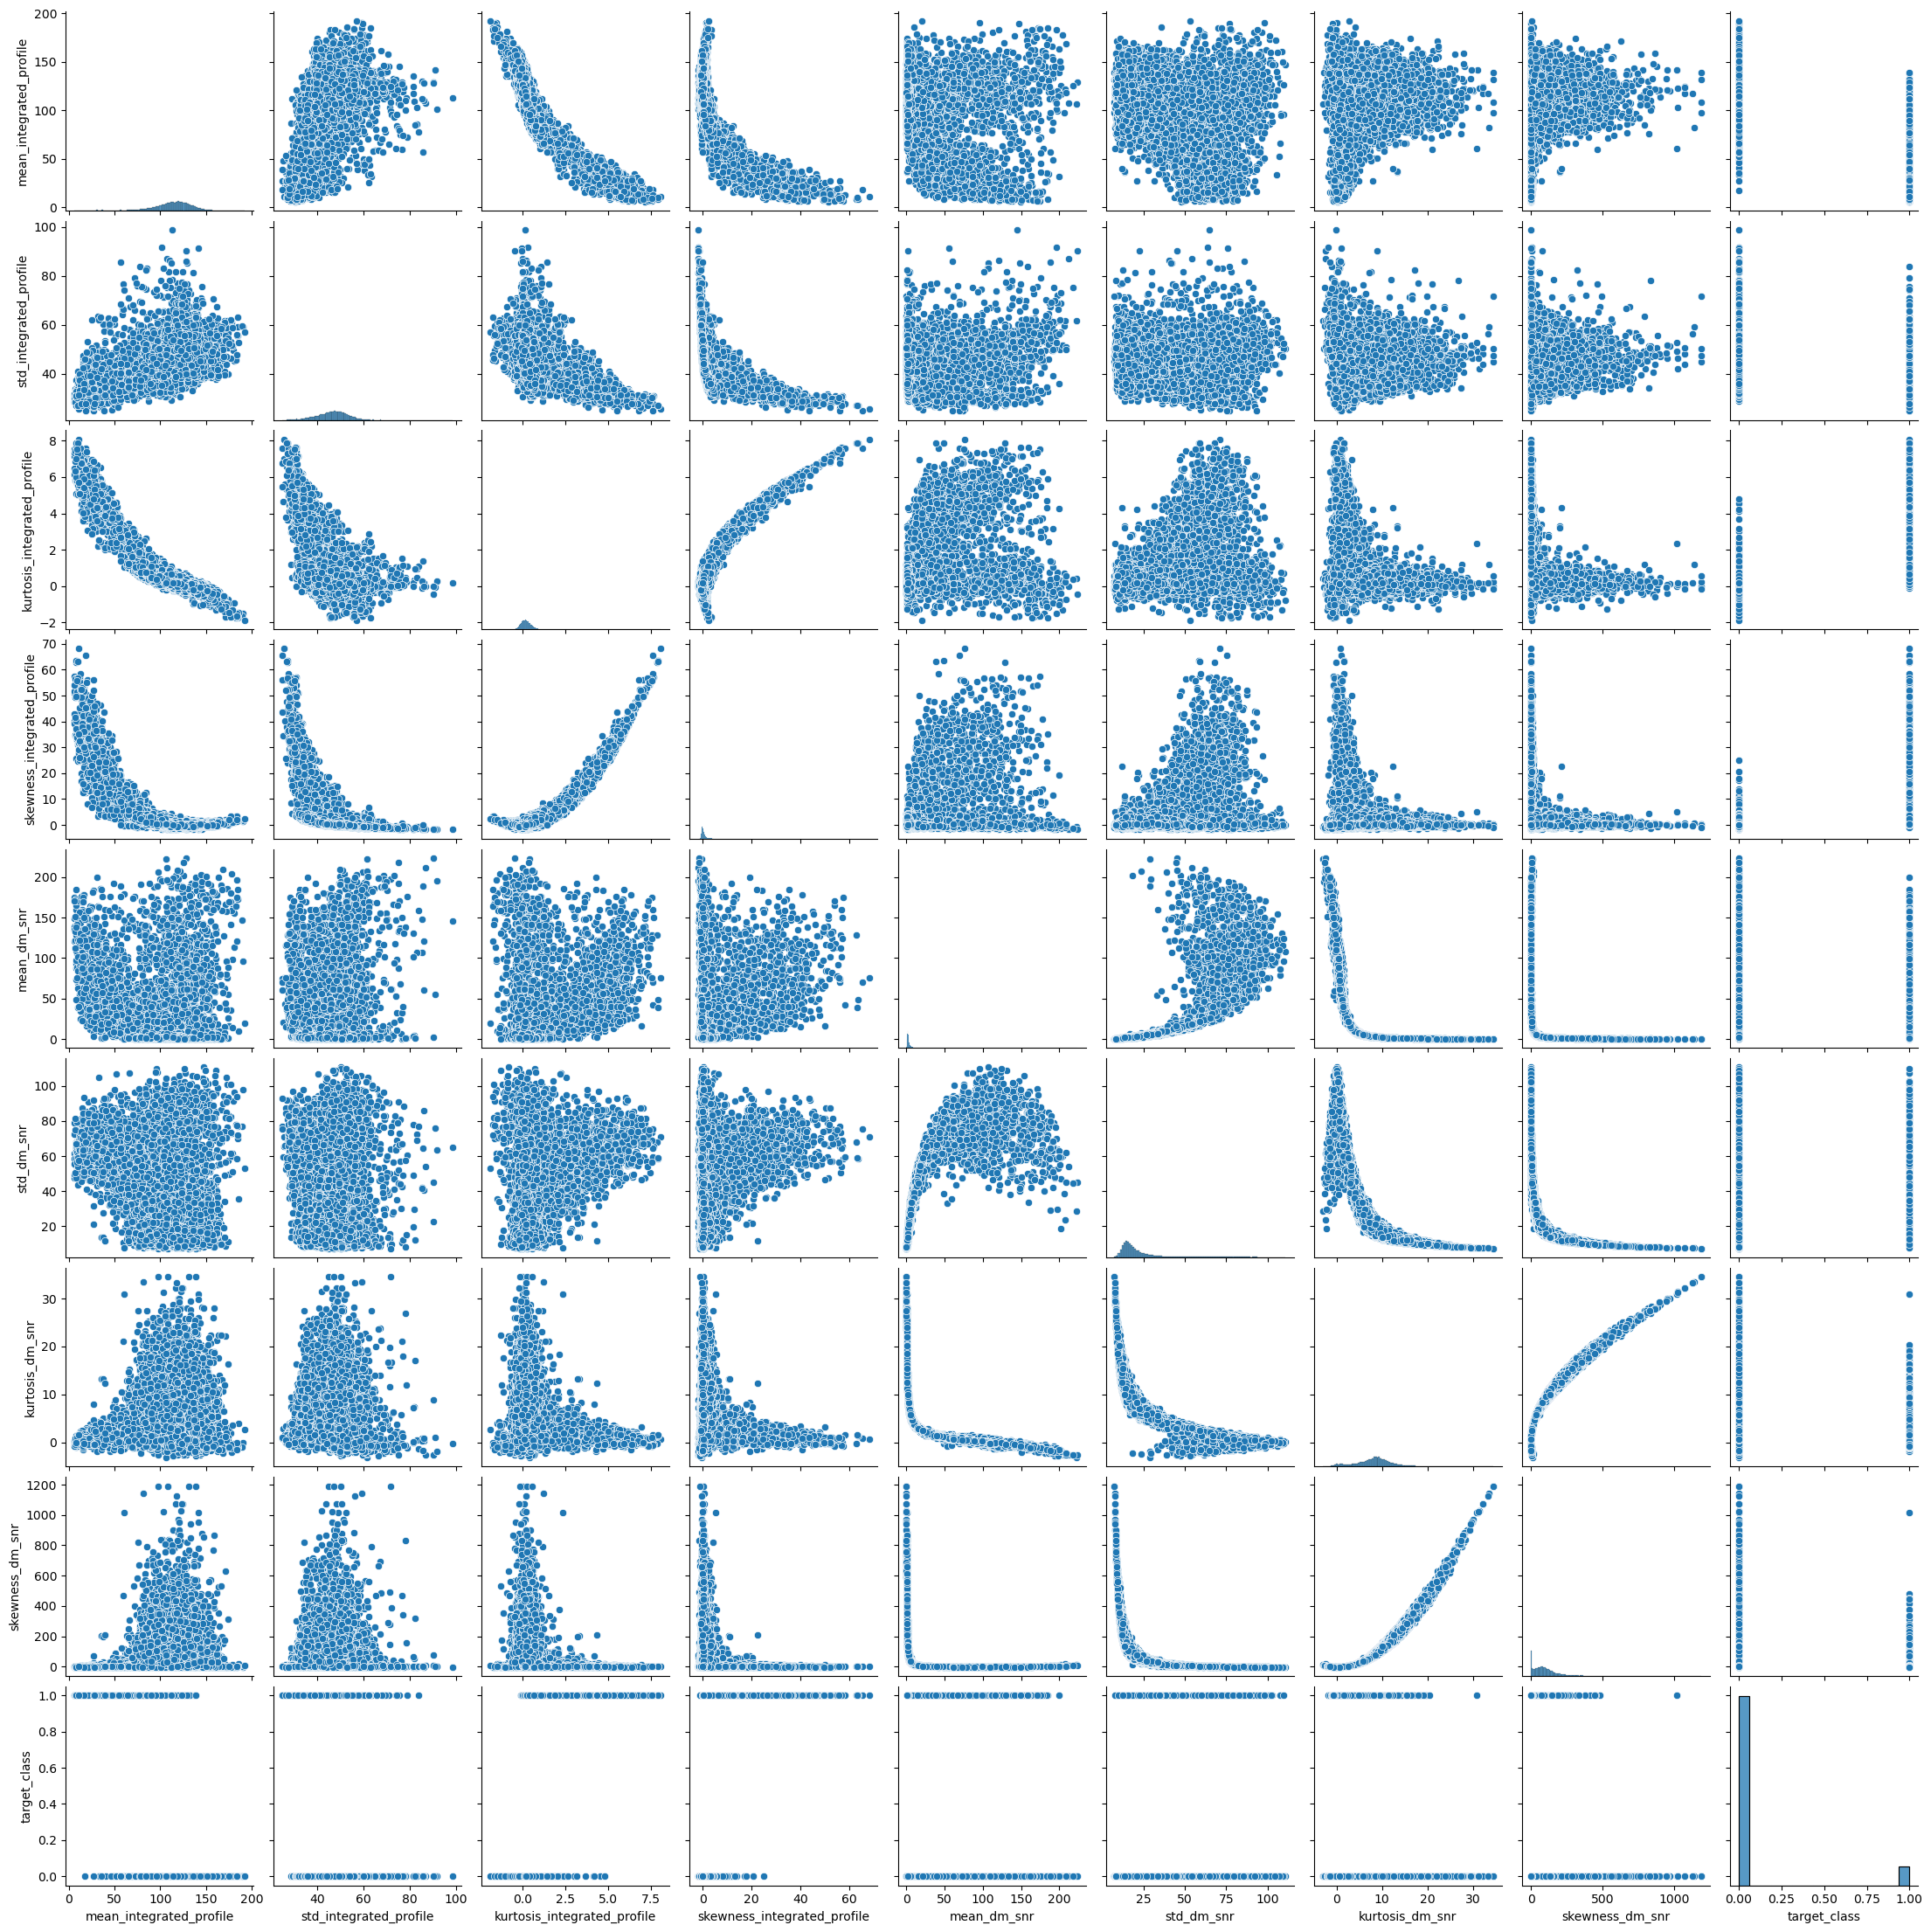

In [15]:
sns.pairplot(df_stars)


In [17]:
px.box(df_stars,x='target_class', y='skewness_dm_snr', color='target_class')

In [18]:
px.box(df_stars,x='target_class', y='kurtosis_dm_snr', color='target_class')

In [19]:
px.box(df_stars,x='target_class', y='std_dm_snr', color='target_class')

In [ ]:
# Um teste estatístico para verificar se existe uma diferença significativa entre as médias de 2 grupos
# H0 - Não há diferença significativa entre as Médias dos grupos
# H1 - Há uma diferença significativa entre as médias dos grupos

grupo_positivo_kurtosis = df_stars[df_stars['target_class'] == 1]['std_dm_snr']
grupo_negativo_kurtosis = df_stars[df_stars['target_class'] == 0]['std_dm_snr']

ttest(grupo_positivo_kurtosis,grupo_negativo_kurtosis)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,65.761578,1880.662296,two-sided,0.0,"[32.19, 34.17]",1.956821,inf,1.0


In [25]:
grupo_positivo_std_integrated_profile = df_stars[df_stars['target_class'] == 1]['std_integrated_profile']
grupo_negativo_std_integrated_profile = df_stars[df_stars['target_class'] == 0]['std_integrated_profile']

ttest(grupo_positivo_std_integrated_profile,grupo_negativo_std_integrated_profile)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-42.24278,1838.791596,two-sided,3.992724e-273,"[-9.03, -8.23]",1.353655,inf,1.0


In [26]:
grupo_positivo_std_skewness_dm_snr = df_stars[df_stars['target_class'] == 1]['skewness_dm_snr']
grupo_negativo_std_skewness_dm_snr = df_stars[df_stars['target_class'] == 0]['skewness_dm_snr']

ttest(grupo_positivo_std_skewness_dm_snr,grupo_negativo_std_skewness_dm_snr)


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-63.357404,3345.55532,two-sided,0.0,"[-98.65, -92.73]",0.930104,inf,1.0


In [28]:
corr_matrix = df_stars.corr()
corr_matrix

,mean_integrated_profile,std_integrated_profile,kurtosis_integrated_profile,skewness_integrated_profile,mean_dm_snr,std_dm_snr,kurtosis_dm_snr,skewness_dm_snr,target_class
mean_integrated_profile,1.000000,0.547137,-0.873898,-0.738775,-0.298841,-0.307016,0.234331,0.144033,-0.673181
std_integrated_profile,0.547137,1.000000,-0.521435,-0.539793,0.006869,-0.047632,0.029429,0.027691,-0.363708
kurtosis_integrated_profile,-0.873898,-0.521435,1.000000,0.945729,0.414368,0.432880,-0.341209,-0.214491,0.791591
skewness_integrated_profile,-0.738775,-0.539793,0.945729,1.000000,0.412056,0.415140,-0.328843,-0.204782,0.709528
mean_dm_snr,-0.298841,0.006869,0.414368,0.412056,1.000000,0.796555,-0.615971,-0.354269,0.400876
std_dm_snr,-0.307016,-0.047632,0.432880,0.415140,0.796555,1.000000,-0.809786,-0.575800,0.491535
kurtosis_dm_snr,0.234331,0.029429,-0.341209,-0.328843,-0.615971,-0.809786,1.000000,0.923743,-0.390816
skewness_dm_snr,0.144033,0.027691,-0.214491,-0.204782,-0.354269,-0.575800,0.923743,1.000000,-0.259117
target_class,-0.673181,-0.363708,0.791591,0.709528,0.400876,0.491535,-0.390816,-0.259117,1.000000


In [30]:
fig = go.Figure()
fig.add_trace(
    go.Heatmap(
        x = corr_matrix.columns,
        y = corr_matrix.index,
        z = np.array(corr_matrix),
        text= corr_matrix.values,
        texttemplate= '%{text:.2f}',
        colorscale= px.colors.diverging.RdBu,
        zmin=-1,
        zmax=1
    )
)

fig.show()

In [31]:
X = df_stars.drop(columns=['target_class'], axis=1)
y = df_stars['target_class']

X_train, X_test, y_train, y_test = train_test_split(X,y,shuffle=True,test_size=0.3,random_state=42)

In [38]:
# Solver : define qual algoritmo de otimização será usado para encontrar os melhores parâmetros (coeficientes) para o seu modelo.
modelo_lr = LogisticRegression(solver='liblinear')

In [39]:
modelo_lr.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


## Métricas Baseline

In [41]:
y_pred = modelo_lr.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [42]:
y_decision = modelo_lr.decision_function(X_test)

In [43]:
y_decision

array([-5.08270758,  0.98306442, -4.04309082, ..., -6.13099424,
       -5.10392744, -3.66615235])

In [44]:
y_prob = modelo_lr.predict_proba(X_test)
y_prob

array([[0.99383515, 0.00616485],
       [0.27228416, 0.72771584],
       [0.98275929, 0.01724071],
       ...,
       [0.9978303 , 0.0021697 ],
       [0.99396381, 0.00603619],
       [0.97506307, 0.02493693]])

In [45]:
fpr, tpr, thresholds = roc_curve(y_test,y_decision)

In [46]:
roc_auc = auc(fpr,tpr)
roc_auc

0.974844372992521

0.974844372992521, logo é um bom classificador

In [48]:
# Plotar Curva ROC com o valor de AUC
fig = px.area(
    x=fpr,
    y=tpr,
    title=f'Curva ROC (AUC= {roc_auc:.4f})',
    labels=dict(x='FPR',y='TPR'),
    width=700, height=500
)

fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0,x1=1,y0=0, y1=1
)


fig.update_yaxes(scaleanchor="x",scaleratio=1)
fig.update_xaxes(constrain="domain")
fig.show()

In [49]:
importance = np.abs(modelo_lr.coef_)

print("Importância das Features")

for i, feature in enumerate(modelo_lr.feature_names_in_):
    print(f'{feature}: {importance[0][i]}')

Importância das Features
mean_integrated_profile: 0.0020714430511376662
std_integrated_profile: 0.045678586152405935
kurtosis_integrated_profile: 5.172005633073528
skewness_integrated_profile: 0.4903325047681772
mean_dm_snr: 0.0342118251219878
std_dm_snr: 0.04466995916638654
kurtosis_dm_snr: 0.17932764114301541
skewness_dm_snr: 0.0031985138405898174


In [50]:
f1_score_baseline = f1_score(y_test,y_pred)
f1_score_baseline

0.8732083792723263

In [51]:
log_loss(y_test,y_pred)

0.771884569785563

In [52]:
confusion_matrix_dps = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix_dps)

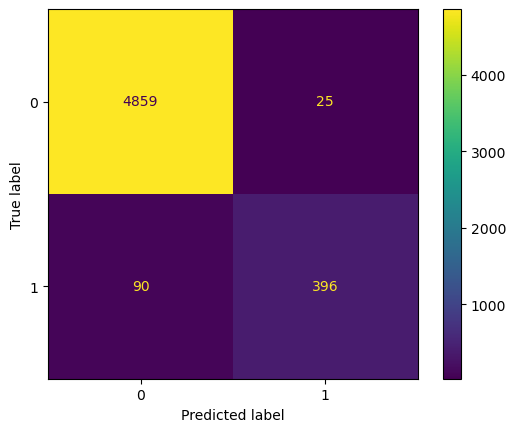

In [53]:
disp.plot()

## Otimizar Hiperparâmetros

In [58]:
# Ajustar hiperparâmetros com Optuna
# Hiperparâmetro penalty
# Regularização controla a complexidade do modelo, reduzindo o overfitting
# L1 (Ridge) é útil para fins de Feature Selection e para modelos esparsos. Soma dos valores absolutos dos coeficientes
# L2 (Lasso) é útil para evitar o overfitting, principalmente quando há multicolinearidade. Soma dos quadrados dos coeficientes

# Hiperparâmetro C
# Valores maiores de C, indica uma regularização mais fraca
# Valores menores de C, indica uma regularização mais forte

def lr_optuna(trial):
    penalty = trial.suggest_categorical('penalty',['l1','l2'])
    c_values = trial.suggest_categorical('c',[100,10,1.0,0.1,0.01])

    # Treinar o modelo
    lr_optuna = LogisticRegression(solver='liblinear',penalty=penalty,C=c_values)
    lr_optuna.fit(X_train,y_train)

    # Retornar a Decision Function
    y_decision_optuna = lr_optuna.decision_function(X_test)

    # Calcular a curva ROC
    fpr,tpr, thresholds = roc_curve(y_test, y_decision_optuna)

    # Calcular AUC
    roc_auc_optuna = auc(fpr,tpr)

    # Retornar Predição
    y_pred_optuna = lr_optuna.predict(X_test)

    f1_score_optuna = f1_score(y_test,y_pred_optuna,average='macro')

    # Calcular o BCE (Binary Cross Entropy - Erro)
    log_loss_optuna = log_loss(y_test, y_pred_optuna)

    return roc_auc_optuna, f1_score_optuna, log_loss_optuna

In [59]:
# Criação do estudo e rodar o otimizador - 10 tentativas (2 X 5)
search_space = {'penalty': ['l1','l2'],
                'c': [100,10,1.0,0.1,0.01]}
sampler = optuna.samplers.GridSampler(search_space=search_space)
estudo_lr = optuna.create_study(directions=['maximize','maximize','minimize'])
estudo_lr.optimize(lr_optuna,n_trials=10)

[I 2025-10-22 16:39:03,077] A new study created in memory with name: no-name-3aeb6500-ac03-4ff0-bf8b-59c764946fc0
[I 2025-10-22 16:39:03,234] Trial 0 finished with values: [0.9756886516145775, 0.9320966579416563, 0.7584604903110316] and parameters: {'penalty': 'l1', 'c': 10}.
[I 2025-10-22 16:39:03,265] Trial 1 finished with values: [0.975627142293809, 0.9320966579416563, 0.7584604903110316] and parameters: {'penalty': 'l2', 'c': 100}.
[I 2025-10-22 16:39:03,296] Trial 2 finished with values: [0.975627142293809, 0.9320966579416563, 0.7584604903110316] and parameters: {'penalty': 'l2', 'c': 100}.
[I 2025-10-22 16:39:03,325] Trial 3 finished with values: [0.974844372992521, 0.9307565337834224, 0.771884569785563] and parameters: {'penalty': 'l2', 'c': 1.0}.
[I 2025-10-22 16:39:03,348] Trial 4 finished with values: [0.9713947954688695, 0.9270885333480574, 0.8054447684718918] and parameters: {'penalty': 'l2', 'c': 0.1}.
[I 2025-10-22 16:39:03,377] Trial 5 finished with values: [0.9755871191

In [60]:
melhor_trial = max(estudo_lr.best_trials, key= lambda t: t.values[1])
print(f'Trial com melhor AUC e F1 e menor BCE:')
print(f'\tnumber: {melhor_trial.number}')
print(f'\tnumber: {melhor_trial.params}')
print(f'\tnumber: {melhor_trial.values}')

Trial com melhor AUC e F1 e menor BCE:
	number: 0
	number: {'penalty': 'l1', 'c': 10}
	number: [0.9756886516145775, 0.9320966579416563, 0.7584604903110316]


In [61]:
fig = optuna.visualization.plot_pareto_front(estudo_lr)
fig.show()

In [62]:
# Comparação entre melhor resultado da otimização e baseline - AUC
print(f'AUC: baseline={roc_auc}, optuna={melhor_trial.values[0]}')

AUC: baseline=0.974844372992521, optuna=0.9756886516145775


In [63]:
# Comparação entre melhor resultado da otimização e baseline - F1 score
print(f'f1: baseline={f1_score_baseline}, optuna={melhor_trial.values[1]}')

f1: baseline=0.8732083792723263, optuna=0.9320966579416563


In [64]:
# Comparação entre melhor resultado da otimização e baseline - BCE
print(f'BCE: baseline={log_loss(y_test,y_pred)}, optuna={melhor_trial.values[2]}')

BCE: baseline=0.771884569785563, optuna=0.7584604903110316


In [65]:
lista_thresholds = [0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90]
lista_resultados = {'cenario':[], 'resultado':[]}
lista_resultados['cenario'].append('baseline')
lista_resultados['resultado'].append(f1_score_baseline)
lista_resultados['cenario'].append('optuna')
lista_resultados['resultado'].append(melhor_trial.values[1])

for novo_threshold in lista_thresholds:
    y_pred_threshold = (modelo_lr.predict_proba(X_test)[:, 1] >= novo_threshold).astype(int)
    f1_score_threshold = f1_score(y_test,y_pred_threshold,average='macro')
    lista_resultados['cenario'].append(str(novo_threshold))
    lista_resultados['resultado'].append(f1_score_threshold)

In [66]:
df_resultados = pd.DataFrame(lista_resultados)
df_resultados

,cenario,resultado
0,baseline,0.873208
1,optuna,0.932097
2,0.55,0.928449
3,0.6,0.924732
4,0.65,0.921644
5,0.7,0.915839
6,0.75,0.906464
7,0.8,0.904795
8,0.85,0.901948
9,0.9,0.891919


In [67]:
# Apresentar resultados dos F1 Scores
px.line(df_resultados,x='cenario',y='resultado')

In [68]:
import joblib

joblib.dump(modelo_lr,'modelo_pulsar.pkl')

['modelo_pulsar.pkl']